In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import xgboost as xgb 

In [2]:
df = pd.read_csv("C:\\Users\\mesho\\OneDrive\\Desktop\\ML Assignment\\case_time_series.csv")
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
490,3 June 2021,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,4 June 2021,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,5 June 2021,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,6 June 2021,2021-06-06,101209,28909437,174156,27150821,2444,348638


Let's do get some summary statastics of the dataframe 

In [3]:
df.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,495.000000,4.950000e+02,495.000000,4.950000e+02,495.000000,495.000000
mean,58576.242424,7.037673e+06,55219.569697,6.341560e+06,708.573737,95647.365657
std,88204.247844,7.258510e+06,85635.502147,6.567559e+06,1011.352961,85930.141925
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,8557.500000,2.027795e+05,4460.500000,9.800950e+04,104.000000,5718.000000
50%,25561.000000,6.547422e+06,21969.000000,5.506718e+06,378.000000,101226.000000
75%,65383.000000,1.079726e+07,60438.500000,1.048724e+07,864.500000,154211.000000
max,414280.000000,2.899524e+07,422391.000000,2.733369e+07,4529.000000,350744.000000


In [4]:
df.shape

(495, 8)

In [5]:
# Checking how the data is organized and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             495 non-null    object
 1   Date_YMD         495 non-null    object
 2   Daily Confirmed  495 non-null    int64 
 3   Total Confirmed  495 non-null    int64 
 4   Daily Recovered  495 non-null    int64 
 5   Total Recovered  495 non-null    int64 
 6   Daily Deceased   495 non-null    int64 
 7   Total Deceased   495 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.1+ KB


In [6]:
# CHecking null values
df.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

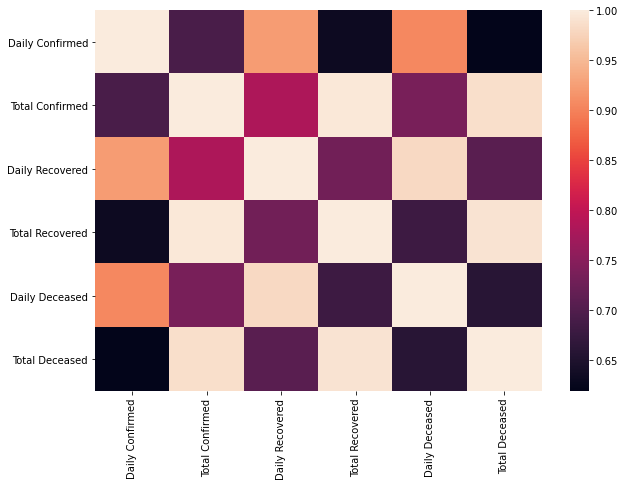

In [7]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr)

In [8]:
df.dtypes

Date               object
Date_YMD           object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

As we can see that the Date_YMD column is an object type so we need to convert into time series from object type

In [9]:
df["Date_YMD"]=pd.to_datetime(df['Date_YMD'])
df.dtypes

Date                       object
Date_YMD           datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

Successfully converted into time-series data type

In [10]:
df.drop(['Date'], axis=1,inplace=True)
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
490,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,2021-06-06,101209,28909437,174156,27150821,2444,348638


In [11]:
df.rename({'Date_YMD':'Date'}, axis=1, inplace=True)
print(df)

          Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0   2020-01-30                1                1                0   
1   2020-01-31                0                1                0   
2   2020-02-01                0                1                0   
3   2020-02-02                1                2                0   
4   2020-02-03                1                3                0   
..         ...              ...              ...              ...   
490 2021-06-03           132424         28573286           206722   
491 2021-06-04           120454         28693740           197763   
492 2021-06-05           114488         28808228           189374   
493 2021-06-06           101209         28909437           174156   
494 2021-06-07            85803         28995240           182866   

     Total Recovered  Daily Deceased  Total Deceased  
0                  0               0               0  
1                  0               0               0  
2     

In [12]:
df['Death_rate'] = df['Daily Deceased']/df['Daily Confirmed']

In [13]:
df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Death_rate
0,2020-01-30,1,1,0,0,0,0,0.000000
1,2020-01-31,0,1,0,0,0,0,NaN
2,2020-02-01,0,1,0,0,0,0,NaN
3,2020-02-02,1,2,0,0,0,0,0.000000
4,2020-02-03,1,3,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
490,2021-06-03,132424,28573286,206722,26589528,2717,340140,0.020517
491,2021-06-04,120454,28693740,197763,26787291,3372,343512,0.027994
492,2021-06-05,114488,28808228,189374,26976665,2682,346194,0.023426
493,2021-06-06,101209,28909437,174156,27150821,2444,348638,0.024148


In [14]:
df.shape

(495, 8)

In [15]:
# Checking how the data is organized and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             495 non-null    datetime64[ns]
 1   Daily Confirmed  495 non-null    int64         
 2   Total Confirmed  495 non-null    int64         
 3   Daily Recovered  495 non-null    int64         
 4   Total Recovered  495 non-null    int64         
 5   Daily Deceased   495 non-null    int64         
 6   Total Deceased   495 non-null    int64         
 7   Death_rate       466 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 31.1 KB


In [16]:
# Checking null values
df.isnull().sum()

Date                0
Daily Confirmed     0
Total Confirmed     0
Daily Recovered     0
Total Recovered     0
Daily Deceased      0
Total Deceased      0
Death_rate         29
dtype: int64

In [17]:
df['Death_rate'] = df['Death_rate'].fillna(0)

In [18]:
df2=df.reset_index()['Death_rate']
df2.max()

0.18076853689337904

In [20]:
df2.shape

(495,)

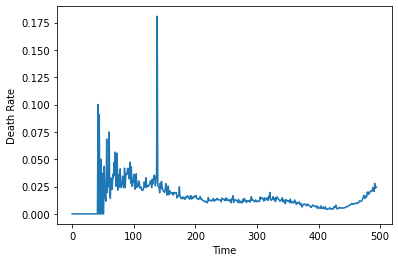

In [22]:
plt.plot(df2)
plt.xlabel('Time')
plt.ylabel('Death Rate')
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.55319361],
       [0.        ],
       [0.50290328],
       [0.        ],
       [0.        ],
       [0.276

In [24]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [25]:
training_size,test_size

(321, 174)

In [26]:
train_data

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.55319361],
       [0.        ],
       [0.50290328],
       [0.        ],
       [0.        ],
       [0.276

In [27]:
np.shape(test_size)

()

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(220, 100)
(220,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Model Training

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 8s 674ms/step - loss: 0.0124 - val_loss: 0.0016
Epoch 2/100
4/4 [==============================] - 1s 151ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 3/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0041 - val_loss: 7.1778e-04
Epoch 4/100
4/4 [==============================] - 1s 141ms/step - loss: 0.0044 - val_loss: 6.4633e-04
Epoch 5/100
4/4 [==============================] - 1s 129ms/step - loss: 0.0063 - val_loss: 8.7665e-04
Epoch 6/100
4/4 [==============================] - 1s 133ms/step - loss: 0.0028 - val_loss: 5.3739e-04
Epoch 7/100
4/4 [==============================] - 1s 135ms/step - loss: 0.0018 - val_loss: 4.9857e-04
Epoch 8/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0017 - val_loss: 4.7795e-04
Epoch 9/100
4/4 [==============================] - 1s 131ms/step - loss: 0.0039 - val_loss: 3.7941e-04
Epoch 10/100
4/4 [==============================] - 1s 135ms/step - loss: 0.0019 

Epoch 80/100
4/4 [==============================] - 1s 164ms/step - loss: 0.0024 - val_loss: 4.7455e-04
Epoch 81/100
4/4 [==============================] - 1s 176ms/step - loss: 0.0058 - val_loss: 3.2284e-04
Epoch 82/100
4/4 [==============================] - 1s 164ms/step - loss: 0.0024 - val_loss: 4.5016e-04
Epoch 83/100
4/4 [==============================] - 1s 157ms/step - loss: 0.0035 - val_loss: 5.4862e-04
Epoch 84/100
4/4 [==============================] - 1s 155ms/step - loss: 0.0035 - val_loss: 5.7044e-04
Epoch 85/100
4/4 [==============================] - 1s 155ms/step - loss: 0.0035 - val_loss: 4.6955e-04
Epoch 86/100
4/4 [==============================] - 1s 156ms/step - loss: 0.0017 - val_loss: 4.4740e-04
Epoch 87/100
4/4 [==============================] - 1s 165ms/step - loss: 0.0035 - val_loss: 2.6432e-04
Epoch 88/100
4/4 [==============================] - 1s 157ms/step - loss: 0.0018 - val_loss: 5.9112e-04
Epoch 89/100
4/4 [==============================] - 1s 157ms/ste

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.4.1'

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.10511611154728134

In [41]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.062296143030795934

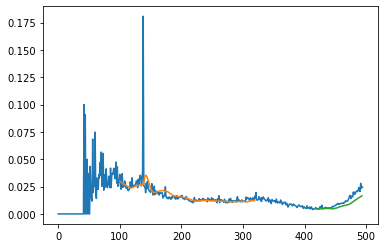

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

174

In [45]:
x_input=test_data[74:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.0382636801457927,
 0.04147824969457987,
 0.03614680227490079,
 0.02761999673536714,
 0.037155776416733816,
 0.03290662726065006,
 0.02954462789865686,
 0.028772000235454023,
 0.027384038670525815,
 0.041165305488167624,
 0.03026090831771318,
 0.028255661395896504,
 0.03117210939360964,
 0.03496771266245437,
 0.025037994015363833,
 0.029428804542570134,
 0.0358333179496423,
 0.026395476249911023,
 0.02174470320074946,
 0.02542424074746903,
 0.02474630790911615,
 0.025065463958169304,
 0.02681837329377076,
 0.03243816142139397,
 0.025785808341758237,
 0.024062887545154097,
 0.025938167982872972,
 0.027468899855162585,
 0.023926357764487448,
 0.02620556721007337,
 0.03688857984764922,
 0.03513411931977571,
 0.03180601621396633,
 0.04430619569192048,
 0.030576329329426402,
 0.025422794505791584,
 0.025550609581040894,
 0.030223391845419747,
 0.029964873066752554,
 0.033641796011852604,
 0.02950213271755843,
 0.030385491266344836,
 0.02943177289382298,
 0.030267124637306915,
 0.030630644

In [48]:
#prediction for next 50 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<50):
    
    if(len(temp_input)>74):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04147825 0.0361468  0.02762    0.03715578 0.03290663 0.02954463
 0.028772   0.02738404 0.04116531 0.03026091 0.02825566 0.03117211
 0.03496771 0.02503799 0.0294288  0.03583332 0.02639548 0.0217447
 0.02542424 0.02474631 0.02506546 0.02681837 0.03243816 0.02578581
 0.02406289 0.02593817 0.0274689  0.02392636 0.02620557 0.03688858
 0.03513412 0.03180602 0.0443062  0.03057633 0.02542279 0.02555061
 0.03022339 0.02996487 0.0336418  0.02950213 0.03038549 0.02943177
 0.03026712 0.03063064 0.02877059 0.03020741 0.03163106 0.03176312
 0.03258067 0.03781906 0.0379802  0.03680926 0.03754712 0.04197463
 0.04376462 0.04379903 0.04782659 0.05008898 0.05316085 0.0500884
 0.04850596 0.05192672 0.05116544 0.05347382 0.05470569 0.05334536
 0.05238434 0.05754885 0.05605803 0.0565942  0.06512585 0.0666267
 0.06297247 0.06451143 0.06594116 0.07257666 0.08043612 0.09115398
 0.09374935 0.07765505 0.08981538 0.09017112 0.08586205 0.11057219
 0.0991109  0.11011357 0.1005117  0.10878062 0.114748

9 day output [[0.0819868]]
10 day input [0.02825566 0.03117211 0.03496771 0.02503799 0.0294288  0.03583332
 0.02639548 0.0217447  0.02542424 0.02474631 0.02506546 0.02681837
 0.03243816 0.02578581 0.02406289 0.02593817 0.0274689  0.02392636
 0.02620557 0.03688858 0.03513412 0.03180602 0.0443062  0.03057633
 0.02542279 0.02555061 0.03022339 0.02996487 0.0336418  0.02950213
 0.03038549 0.02943177 0.03026712 0.03063064 0.02877059 0.03020741
 0.03163106 0.03176312 0.03258067 0.03781906 0.0379802  0.03680926
 0.03754712 0.04197463 0.04376462 0.04379903 0.04782659 0.05008898
 0.05316085 0.0500884  0.04850596 0.05192672 0.05116544 0.05347382
 0.05470569 0.05334536 0.05238434 0.05754885 0.05605803 0.0565942
 0.06512585 0.0666267  0.06297247 0.06451143 0.06594116 0.07257666
 0.08043612 0.09115398 0.09374935 0.07765505 0.08981538 0.09017112
 0.08586205 0.11057219 0.0991109  0.11011357 0.1005117  0.10878062
 0.11474883 0.11590551 0.11287752 0.12133523 0.13315501 0.11959917
 0.11350111 0.15486151 

19 day output [[0.07324246]]
20 day input [0.02506546 0.02681837 0.03243816 0.02578581 0.02406289 0.02593817
 0.0274689  0.02392636 0.02620557 0.03688858 0.03513412 0.03180602
 0.0443062  0.03057633 0.02542279 0.02555061 0.03022339 0.02996487
 0.0336418  0.02950213 0.03038549 0.02943177 0.03026712 0.03063064
 0.02877059 0.03020741 0.03163106 0.03176312 0.03258067 0.03781906
 0.0379802  0.03680926 0.03754712 0.04197463 0.04376462 0.04379903
 0.04782659 0.05008898 0.05316085 0.0500884  0.04850596 0.05192672
 0.05116544 0.05347382 0.05470569 0.05334536 0.05238434 0.05754885
 0.05605803 0.0565942  0.06512585 0.0666267  0.06297247 0.06451143
 0.06594116 0.07257666 0.08043612 0.09115398 0.09374935 0.07765505
 0.08981538 0.09017112 0.08586205 0.11057219 0.0991109  0.11011357
 0.1005117  0.10878062 0.11474883 0.11590551 0.11287752 0.12133523
 0.13315501 0.11959917 0.11350111 0.15486151 0.12959133 0.13358547
 0.13577914 0.09535163 0.09632919 0.09622877 0.09518339 0.09344221
 0.09126628 0.088882

29 day output [[0.07779929]]
30 day input [0.03513412 0.03180602 0.0443062  0.03057633 0.02542279 0.02555061
 0.03022339 0.02996487 0.0336418  0.02950213 0.03038549 0.02943177
 0.03026712 0.03063064 0.02877059 0.03020741 0.03163106 0.03176312
 0.03258067 0.03781906 0.0379802  0.03680926 0.03754712 0.04197463
 0.04376462 0.04379903 0.04782659 0.05008898 0.05316085 0.0500884
 0.04850596 0.05192672 0.05116544 0.05347382 0.05470569 0.05334536
 0.05238434 0.05754885 0.05605803 0.0565942  0.06512585 0.0666267
 0.06297247 0.06451143 0.06594116 0.07257666 0.08043612 0.09115398
 0.09374935 0.07765505 0.08981538 0.09017112 0.08586205 0.11057219
 0.0991109  0.11011357 0.1005117  0.10878062 0.11474883 0.11590551
 0.11287752 0.12133523 0.13315501 0.11959917 0.11350111 0.15486151
 0.12959133 0.13358547 0.13577914 0.09535163 0.09632919 0.09622877
 0.09518339 0.09344221 0.09126628 0.08888228 0.08646537 0.08413959
 0.0819868  0.0800543  0.0783672  0.07693434 0.07575381 0.07481632
 0.07410942 0.07361726

39 day output [[0.07922224]]
40 day input [0.03038549 0.02943177 0.03026712 0.03063064 0.02877059 0.03020741
 0.03163106 0.03176312 0.03258067 0.03781906 0.0379802  0.03680926
 0.03754712 0.04197463 0.04376462 0.04379903 0.04782659 0.05008898
 0.05316085 0.0500884  0.04850596 0.05192672 0.05116544 0.05347382
 0.05470569 0.05334536 0.05238434 0.05754885 0.05605803 0.0565942
 0.06512585 0.0666267  0.06297247 0.06451143 0.06594116 0.07257666
 0.08043612 0.09115398 0.09374935 0.07765505 0.08981538 0.09017112
 0.08586205 0.11057219 0.0991109  0.11011357 0.1005117  0.10878062
 0.11474883 0.11590551 0.11287752 0.12133523 0.13315501 0.11959917
 0.11350111 0.15486151 0.12959133 0.13358547 0.13577914 0.09535163
 0.09632919 0.09622877 0.09518339 0.09344221 0.09126628 0.08888228
 0.08646537 0.08413959 0.0819868  0.0800543  0.0783672  0.07693434
 0.07575381 0.07481632 0.07410942 0.07361726 0.07332141 0.07320303
 0.07324246 0.07341882 0.07371118 0.07409846 0.07455991 0.07507454
 0.07562286 0.0761863

49 day output [[0.0740409]]
[[0.09535162895917892], [0.09632918983697891], [0.09622877091169357], [0.09518339484930038], [0.09344220906496048], [0.09126628190279007], [0.08888228237628937], [0.08646536618471146], [0.08413959294557571], [0.08198679983615875], [0.08005429804325104], [0.0783671960234642], [0.0769343376159668], [0.07575380802154541], [0.07481632381677628], [0.07410942018032074], [0.07361725717782974], [0.07332140952348709], [0.07320303469896317], [0.07324245572090149], [0.07341881841421127], [0.07371117919683456], [0.07409846037626266], [0.07455991208553314], [0.07507453858852386], [0.07562286406755447], [0.07618630677461624], [0.0767473429441452], [0.07728974521160126], [0.07779929041862488], [0.07826372236013412], [0.07867162674665451], [0.07901403307914734], [0.07928469032049179], [0.07947729527950287], [0.07958899438381195], [0.07961852103471756], [0.0795661136507988], [0.07943301647901535], [0.07922223955392838], [0.07893738895654678], [0.07858359813690186], [0.078166

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [50]:
import matplotlib.pyplot as plt

In [52]:
len(df2)

495

In [53]:
df3 = df2.tolist()
df3.extend(lst_output)

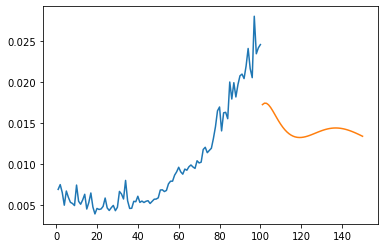

In [54]:
plt.plot(day_new,scaler.inverse_transform(df2[395:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

As We can see that for the next 50 Days the Total case prediction will drop out to this value 

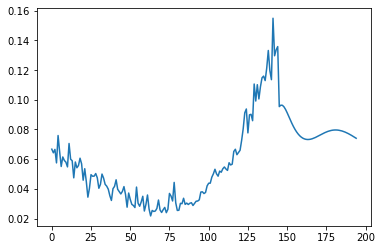

In [56]:
df3 = df2.tolist()
df3.extend(lst_output)
plt.plot(df3[350:])